In [13]:
import cavendish.utils.Dataloader as dl

In [14]:

import os
from sympy import symbols, Eq, latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [15]:
print(os.getcwd())

/home/lucas/repos/advanced_exp/FAFO


In [16]:


dfs = dl.load_convert("../Databases/Cavendish-Experiment-PHY64-In-person-data.csv")

In [17]:
display(dfs[0].head())
display(dfs[1])

Measurement 1                            
     Time (sec)   Radians Uncertainty (rad)
0             0 -0.000314          0.000235
1            20 -0.001594          0.000236
2            40 -0.004833          0.000240
3            60 -0.008749          0.000246
4            80 -0.013115          0.000256

Measurement 2                            
      Time (sec)   Radians Uncertainty (rad)
0            0.0 -0.011309          0.000252
1           20.0 -0.010179          0.000249
2           40.0 -0.008372          0.000245
3           60.0 -0.006415          0.000242
4           80.0 -0.004984          0.000240
5          100.0 -0.004381          0.000239
6          120.0 -0.004532          0.000239
7          140.0 -0.005360          0.000240
8          160.0 -0.006565          0.000242
9          180.0 -0.008146          0.000245
10         200.0 -0.009276          0.000247
11         220.0 -0.010556          0.000250
12         240.0 -0.009803          0.000248
13         260.0 -0.009050          0.000247
14         280.0 -0.007996          0.000245
15         300.0 -0.006716          0.000242
16         320.0 -0.005661          0.000241
17         340.0 -0.005210          0.000240
18         360.0 -0.005285          0.000240
19         380.0 -0.005887          0.000241
20         400.0 -0.006716          0.000242
21         420.0 -0.007845          0.000244
22         440.0 -0.008674          0.000246
23         460.0 -0.009201          0.000247
24         480.0 -0.009050          0.000247
25         500.0 -0.008674          0.000246
26         520.0 -0.007845          0.000244
27         540.0 -0.006942          0.000243
28         560.0 -0.006264          0.000242
29         580.0 -0.005737          0.000241
30         600.0 -0.005737          0.000241
31         620.0 -0.006264          0.000242
32         640.0 -0.006942          0.000243
33         660.0 -0.007619          0.000244
34         680.0 -0.008222          0.000245
35         700.0 -0.008674          0.000246
36         720.0 -0.008598          0.000246
37         740.0 -0.008448          0.000245
38         760.0 -0.007921          0.000244
39         780.0 -0.007092          0.000243
40         800.0 -0.006490          0.000242
41         820.0 -0.006189          0.000242
42         840.0 -0.006189          0.000242
43         860.0 -0.006415          0.000242
44         880.0 -0.006942          0.000243
45         900.0 -0.007921          0.000244
46         920.0 -0.008222          0.000245

In [18]:
"""
dfs[0]['Measurement 1']
time = dfs[0]['Measurement 1','Time (sec)']
radians = dfs[0]['Measurement 1','Radians']
position = dfs[0]['Measurement 1','Radians']
uncertainties = dfs[0]['Measurement 1','Uncertainty (rad)']
"""
dfs[1]['Measurement 2']
time = dfs[1]['Measurement 2','Time (sec)']
radians = dfs[1]['Measurement 2','Radians']
position = dfs[1]['Measurement 2','Radians']
uncertainties = dfs[1]['Measurement 2','Uncertainty (rad)']
#"""

In [19]:
time = np.array(time, dtype=float)
position = np.array(position, dtype=float)
radians = np.array(radians, dtype=float)
theta = 74.66
# time3 = np.array(time3, dtype=float)
# position3 = np.array(position3, dtype=float)


Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Guessed parameters: theta0 = -0.007, period = 240.402, amp = 0.004, delta = -1.305, b = 0.001
Fitted function: $\-0.007 + 0.004 \cdot \sin\left(\frac{2\pi}{240.402} t + -1.305\right) \cdot e^{-0.001t}$


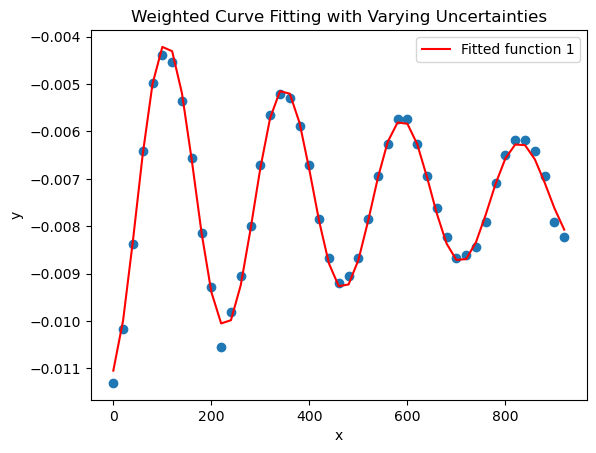

In [20]:


def damped_oscillation(time, theta0, period,amp,delta, b):
    """
    Function to be fit to the data. operates on a point-wise basis.
    
    Arguments:
    time (_float_): time value
    theta0 (_float_): equilibrium value of theta
    amp (_float_): amplitude of osscilations
    period (_float_):
    delta (_float_): 
    b (_float_)
    """
    return theta0 + amp*np.sin(((2*np.pi)/period)*time+delta)*np.exp(-b*time)


p1, cov1 = curve_fit(damped_oscillation, time, position, p0 = [theta, 240,.095, .01, 0.01])

# p3, cov3 = curve_fit(damped_oscillation, time3, position3, p0 = [theta1, 240,.095, .01, 0.01])



print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Guessed parameters: theta0 = {p1[0]:.3f}, period = {p1[1]:.3f}, amp = {p1[2]:.3f}, delta = {p1[3]:.3f}, b = {p1[4]:.3f}")


# Print the fitted function in LaTeX with the fitted parameters
fitted_function_latex = f"$\\{p1[0]:.3f} + {p1[2]:.3f} \\cdot \\sin\\left(\\frac{{2\\pi}}{{{p1[1]:.3f}}} t + {p1[3]:.3f}\\right) \\cdot e^{{-{p1[4]:.3f}t}}$"


print(f"Fitted function: {fitted_function_latex}")



plt.plot(time, damped_oscillation(time, *p1), label='Fitted function 1', color='red')
plt.scatter(time, position)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Curve Fitting with Varying Uncertainties')
plt.show()


$\theta = 0.745 + 0.121 \cdot \sin\left(\frac{2\pi}{241.517} t + 1.526\right) \cdot e^{-0.001t}$

Guessed parameters: theta0 = -0.007, period = 240.402, amp = 0.004, delta = -1.305, b = 0.001
Fitted function: $\-0.007 + 0.004 \cdot \sin\left(\frac{2\pi}{240.402} t + -1.305\right) \cdot e^{-0.001t}$


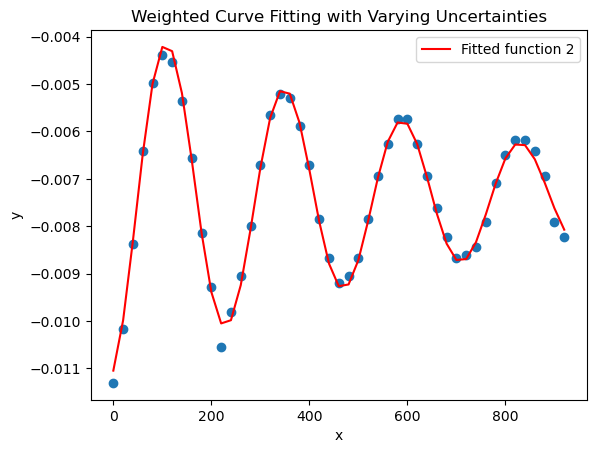

In [21]:
p2, cov2 = curve_fit(damped_oscillation, time, radians, p0 = [0.001, 240,.095, .01, 0.01])

print(f"Guessed parameters: theta0 = {p2[0]:.3f}, period = {p2[1]:.3f}, amp = {p2[2]:.3f}, delta = {p2[3]:.3f}, b = {p2[4]:.3f}")
fitted_function_latex = f"$\\{p2[0]:.3f} + {p2[2]:.3f} \\cdot \\sin\\left(\\frac{{2\\pi}}{{{p2[1]:.3f}}} t + {p2[3]:.3f}\\right) \\cdot e^{{-{p2[4]:.3f}t}}$"
print(f"Fitted function: {fitted_function_latex}")



plt.plot(time, damped_oscillation(time, *p2), label='Fitted function 2', color='red')
plt.scatter(time, radians)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Curve Fitting with Varying Uncertainties')
plt.show()


Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Fitted parameters: theta0 = -0.007, period = 240.413, amp = 0.004, delta = -1.304, b = 0.001
ight) \cdot e^{-0.001t}$ $-0.007 + 0.004 \cdot \sin\left(rac{2\pi}{240.413} t + -1.304


/tmp/ipykernel_131477/3637363143.py:13: RuntimeWarning: overflow encountered in exp
  return theta0 + amp*np.sin(((2*np.pi)/period)*time+delta)*np.exp(-b*time)


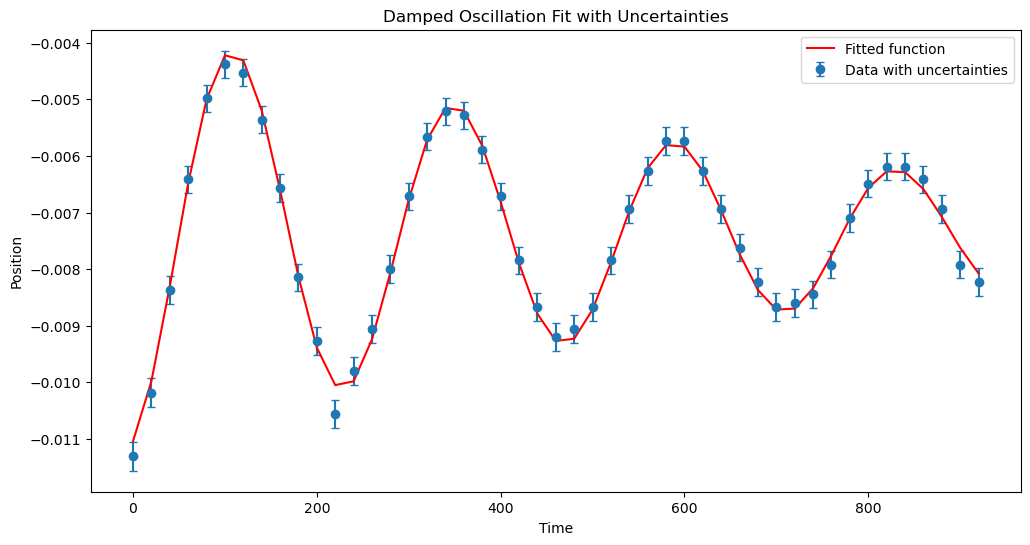

In [22]:

plt.figure(figsize=(12, 6))
p1, cov1 = curve_fit(damped_oscillation, time, position, sigma=uncertainties, absolute_sigma=True, p0=[theta, 240, 0.095, 0.01, 0.01])

# Print fitted function details
print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Fitted parameters: theta0 = {p1[0]:.3f}, period = {p1[1]:.3f}, amp = {p1[2]:.3f}, delta = {p1[3]:.3f}, b = {p1[4]:.3f}")

# Print the fitted function in LaTeX
fitted_function_latex = (f"${p1[0]:.3f} + {p1[2]:.3f} \cdot \sin\left(\frac{{2\pi}}{{{p1[1]:.3f}}} t + {p1[3]:.3f}\right) "
                         f"\cdot e^{{-{p1[4]:.3f}t}}$")
print(f"Fitted function (LaTeX): {fitted_function_latex}")

# Plot the data with error bars
plt.errorbar(time, position, yerr=uncertainties, fmt='o', label='Data with uncertainties', capsize=3)
plt.plot(time, damped_oscillation(time, *p1), label='Fitted function', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Oscillation Fit with Uncertainties')
plt.show()

Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Fitted parameters:
  theta0 = -0.007 ± 3.631977508651328e-05
  period = 240.413 ± 0.904
  amp = 0.004 ± 0.000
  delta = -1.304 ± 0.036
  b = 0.001 ± 0.000
ight) \cdot e^{-0.001 \pm 0.000 t}$m 0.000 + 0.004 \pm 0.000 \cdot \sin\left(rac{2\pi}{240.413} t + -1.304 \pm 0.036


/tmp/ipykernel_131477/3148231962.py:4: RuntimeWarning: overflow encountered in exp
  return theta0 + amp * np.sin(((2 * np.pi) / period) * time + delta) * np.exp(-b * time)


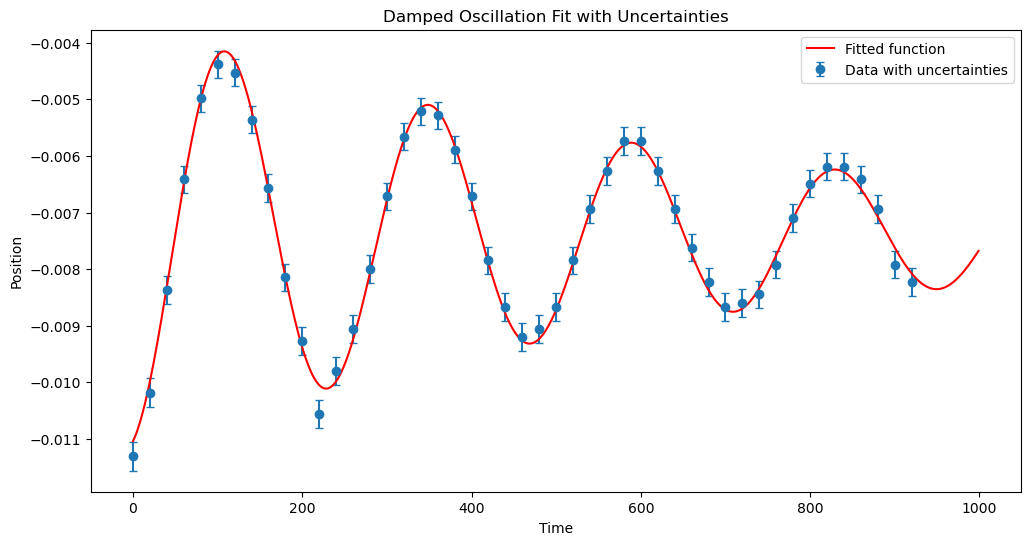

In [23]:

plt.figure(figsize=(12, 6))

def damped_oscillation(time, theta0, period, amp, delta, b):
    return theta0 + amp * np.sin(((2 * np.pi) / period) * time + delta) * np.exp(-b * time)


# Fit the curve using uncertainties
p1, cov1 = curve_fit(damped_oscillation, time, position, sigma=uncertainties, absolute_sigma=True, p0=[theta, 240, 0.095, 0.01, 0.01])

# Calculate the uncertainties (standard deviations) of the fitted parameters
param_uncertainties = np.sqrt(np.diag(cov1))

# Print fitted function details
print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Fitted parameters:")
print(f"  theta0 = {p1[0]:.3f} ± {param_uncertainties[0]}")
print(f"  period = {p1[1]:.3f} ± {param_uncertainties[1]:.3f}")
print(f"  amp = {p1[2]:.3f} ± {param_uncertainties[2]:.3f}")
print(f"  delta = {p1[3]:.3f} ± {param_uncertainties[3]:.3f}")
print(f"  b = {p1[4]:.3f} ± {param_uncertainties[4]:.3f}")

# Print the fitted function in LaTeX
fitted_function_latex = (f"${p1[0]:.3f} \pm {param_uncertainties[0]:.3f} + "
                         f"{p1[2]:.3f} \pm {param_uncertainties[2]:.3f} \cdot "
                         f"\sin\left(\frac{{2\pi}}{{{p1[1]:.3f}}} t + {p1[3]:.3f} \pm {param_uncertainties[3]:.3f}\right) "
                         f"\cdot e^{{-{p1[4]:.3f} \pm {param_uncertainties[4]:.3f} t}}$")
print(f"Fitted function (LaTeX): {fitted_function_latex}")

timearray = np.arange(1000)
# Plot the data with error bars
plt.errorbar(time, position, yerr=uncertainties, fmt='o', label='Data with uncertainties', capsize=3)
plt.plot(timearray, damped_oscillation(timearray, *p1), label='Fitted function', color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Oscillation Fit with Uncertainties')
plt.show()
